In [18]:
# Import dependencies 
import pandas as pd
import sklearn

In [19]:
df_steel = pd.read_csv('steel.csv')

In [20]:
df_steel 

,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
0,178.500,275,0.1530,0.970575,0.942,0.8870,0.0,1.920,0.0,25.107613
1,178.500,950,0.1530,1.212726,0.942,0.8870,0.0,1.920,0.0,140.035334
2,178.500,375,0.1530,1.621165,0.942,0.8870,0.0,1.920,0.0,42.217650
3,178.500,900,0.1530,0.809989,0.942,0.8870,0.0,1.920,0.0,95.015309
4,189.525,900,0.1624,1.036229,0.849,0.9382,0.0,2.035,0.0,113.266773
...,...,...,...,...,...,...,...,...,...,...
548,945.000,900,0.0000,1.735469,0.613,1.1250,0.0,1.730,0.0,370.186559
549,945.000,950,0.0000,1.394783,0.613,1.1250,0.0,1.730,0.0,383.117682
550,945.000,950,0.0000,1.685472,0.613,1.1250,0.0,1.730,0.0,393.925218
551,945.000,950,0.0000,1.353720,0.613,1.1250,0.0,1.730,0.0,407.918133


In [21]:
independent_variables = ['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium',
'percent_copper', 'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']

target_variable = ['tensile_strength']

In [22]:
# Dataframe containing just the independent variables
X = df_steel.loc[:,independent_variables]
print(X.head())
print(X.shape)

   normalising_temperature  tempering_temperature  percent_silicon  \
0                  178.500                    275           0.1530   
1                  178.500                    950           0.1530   
2                  178.500                    375           0.1530   
3                  178.500                    900           0.1530   
4                  189.525                    900           0.1624   

   percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
0          0.970575           0.942          0.8870              0.0   
1          1.212726           0.942          0.8870              0.0   
2          1.621165           0.942          0.8870              0.0   
3          0.809989           0.942          0.8870              0.0   
4          1.036229           0.849          0.9382              0.0   

   percent_carbon  percent_manganese  
0           1.920                0.0  
1           1.920                0.0  
2           1.920            

In [23]:
# Dataframe containing just the targe variable
y = df_steel.loc[:,target_variable]
print(y.head())
print(y.shape)

   tensile_strength
0         25.107613
1        140.035334
2         42.217650
3         95.015309
4        113.266773
(553, 1)


## K Nearest Neighbour

In [24]:
X_subset = X[["percent_copper", "percent_nickel"]]

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import numpy as np

kNN = KNeighborsRegressor()
kNN.fit(X_subset, y)

kNN_scores = cross_validate(kNN, X_subset, y, scoring=('r2', 'neg_mean_squared_error'), cv=10, return_train_score = True)


train_r2_kNN_scores = kNN_scores['train_r2']
train_mean_squared_error_kNN_scores = kNN_scores['train_neg_mean_squared_error']

test_r2_kNN_scores = kNN_scores['test_r2']
test_mean_squared_error_kNN_scores = kNN_scores['test_neg_mean_squared_error']

# train scores
average_train_r2_kNN_score = np.mean(train_r2_kNN_scores)
print("Average Train r2 Score:", average_train_r2_kNN_score)

average_train_mean_squared_error_kNN_score = np.mean(-train_mean_squared_error_kNN_scores)
print("Average Train mean_squared_error Score:", average_train_mean_squared_error_kNN_score)

# test scores
average_test_r2_kNN_score = np.mean(test_r2_kNN_scores)
print("\nAverage Test r2 Score:", average_test_r2_kNN_score)

average_test_mean_squared_error_kNN_score = np.mean(-test_mean_squared_error_kNN_scores)
print("Average Test mean_squared_error Score:", average_test_mean_squared_error_kNN_score)



Average Train r2 Score: 0.45643691717525686
Average Train mean_squared_error Score: 4489.515668569597

Average Test r2 Score: -0.48835070041462425
Average Test mean_squared_error Score: 9328.32680536807


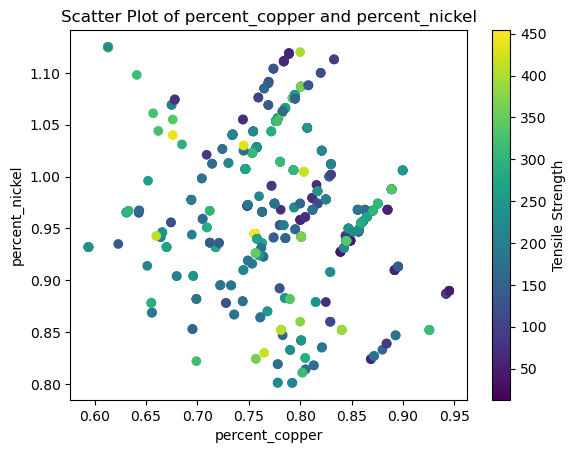

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the X_subset
plt.scatter(X_subset['percent_copper'],X_subset['percent_nickel'], c=y.values, cmap='viridis', marker='o')

# Adding labels and a colorbar
plt.xlabel('percent_copper')
plt.ylabel('percent_nickel')
plt.title('Scatter Plot of percent_copper and percent_nickel')
plt.colorbar(label='Tensile Strength')


In [27]:
# List of range 1-10
one_to_ten = list(range(1,11))

In [28]:
# List of the weights
weights = ["uniform", "distance"]

r2_training_data = []
mse_training_data = []


r2_testing_data = []
mse_testing_data = []

for i in weights:

        for j in range(1, 11):
            # Create a model
            kNN = KNeighborsRegressor(weights = i, n_neighbors = j)
            kNN.fit(X, y)

            kNN_scores = cross_validate(kNN, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=10, return_train_score = True)

            train_r2_kNN_scores = kNN_scores['train_r2']
            train_mean_squared_error_kNN_scores = kNN_scores['train_neg_mean_squared_error']

            test_r2_kNN_scores = kNN_scores['test_r2']
            test_mean_squared_error_kNN_scores = kNN_scores['test_neg_mean_squared_error']
            
            average_train_r2_kNN_score = np.mean(train_r2_kNN_scores)
            print(f"Average Train r2 Score with weights {i} and {j} neighbors: {average_train_r2_kNN_score}")
            r2_training_data.append(average_train_r2_kNN_score)

            average_train_mean_squared_error_kNN_score = np.mean(-train_mean_squared_error_kNN_scores)
            print(f"Average Train mean_squared_error Score with weights {i} and {j} neighbors: {average_train_mean_squared_error_kNN_score}")
            mse_training_data.append(average_train_mean_squared_error_kNN_score)

            average_test_r2_kNN_score = np.mean(test_r2_kNN_scores)
            print(f"Average Test r2 Score with weights {i} and {j} neighbors: {average_test_r2_kNN_score}")
            r2_testing_data.append(average_test_r2_kNN_score)

            average_test_mean_squared_error_kNN_score = np.mean(-test_mean_squared_error_kNN_scores)
            print(f"Average Test mean_squared_error Score with weights {i} and {j} neighbors: {average_test_mean_squared_error_kNN_score}\n")
            mse_testing_data.append(average_test_mean_squared_error_kNN_score)

Average Train r2 Score with weights uniform and 1 neighbors: 1.0
Average Train mean_squared_error Score with weights uniform and 1 neighbors: 0.0
Average Test r2 Score with weights uniform and 1 neighbors: 0.11245786587880016
Average Test mean_squared_error Score with weights uniform and 1 neighbors: 5408.247682645238

Average Train r2 Score with weights uniform and 2 neighbors: 0.8942587922124428
Average Train mean_squared_error Score with weights uniform and 2 neighbors: 873.4330415256366
Average Test r2 Score with weights uniform and 2 neighbors: 0.3051474407738672
Average Test mean_squared_error Score with weights uniform and 2 neighbors: 4327.7905998065335

Average Train r2 Score with weights uniform and 3 neighbors: 0.8300593821724431
Average Train mean_squared_error Score with weights uniform and 3 neighbors: 1403.064933730585
Average Test r2 Score with weights uniform and 3 neighbors: 0.3325697283542609
Average Test mean_squared_error Score with weights uniform and 3 neighbors:

In [29]:
training_uniform_r2 = r2_training_data[0:10]
testing_uniform_r2 = r2_testing_data[0:10]

training_distance_r2 = r2_training_data[10:20]
testing_distance_r2 = r2_testing_data[10:20]


training_uniform_mse = mse_training_data[0:10]
testing_uniform_mse = mse_testing_data[0:10]

training_distance_mse = mse_training_data[10:20]
testing_distance_mse = mse_testing_data[10:20]

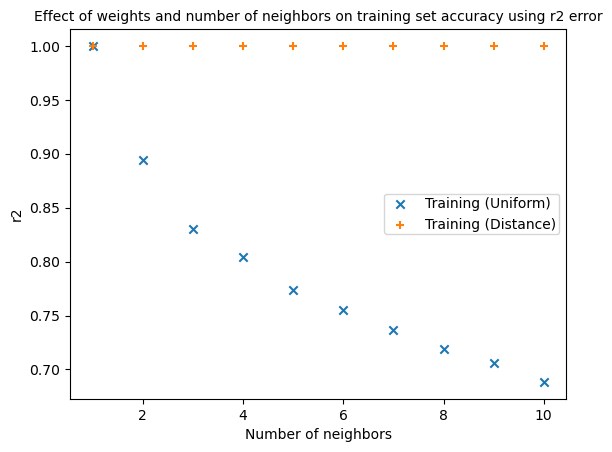

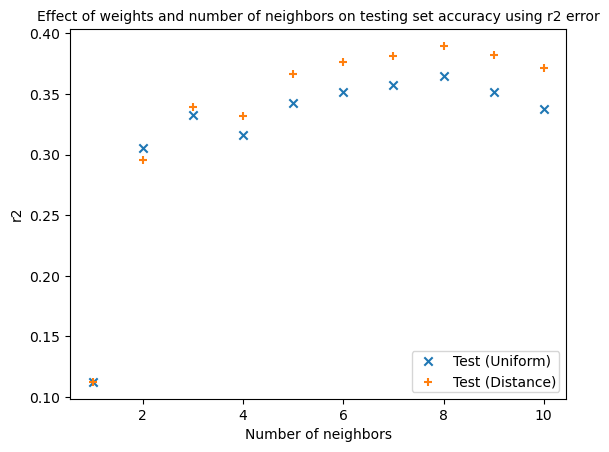

In [30]:
import matplotlib.pyplot as plt

# Plotting the training data for both Uniform and Distance (r2)
plt.scatter(one_to_ten,training_uniform_r2,marker="x")
plt.scatter(one_to_ten,training_distance_r2,marker="+")
#plt.xlim([0, 11])
#plt.ylim([0.7, 1.1])
plt.xlabel("Number of neighbors")
plt.ylabel("r2")
legend_labels = ["Training (Uniform)","Training (Distance)"]
plt.legend(labels=legend_labels, loc="center right", borderpad=0.2)
plt.title("Effect of weights and number of neighbors on training set accuracy using r2 error", fontsize=10)
plt.show()

# Plotting the testing data for both Uniform and Distance (r2)
plt.scatter(one_to_ten,testing_uniform_r2,marker="x")
plt.scatter(one_to_ten,testing_distance_r2,marker="+")
#plt.xlim([0, 11])
#plt.ylim([0.7, 1.1])
plt.xlabel("Number of neighbors")
plt.ylabel("r2")
legend_labels = ["Test (Uniform)","Test (Distance)"]
plt.legend(labels=legend_labels, loc="lower right", borderpad=0.2)
plt.title("Effect of weights and number of neighbors on testing set accuracy using r2 error", fontsize=10)
plt.show()

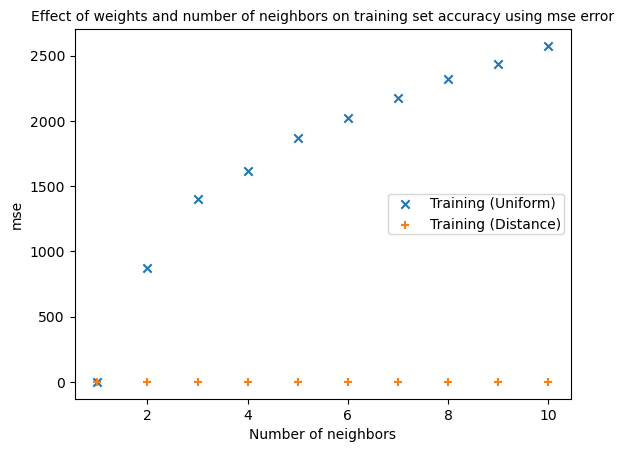

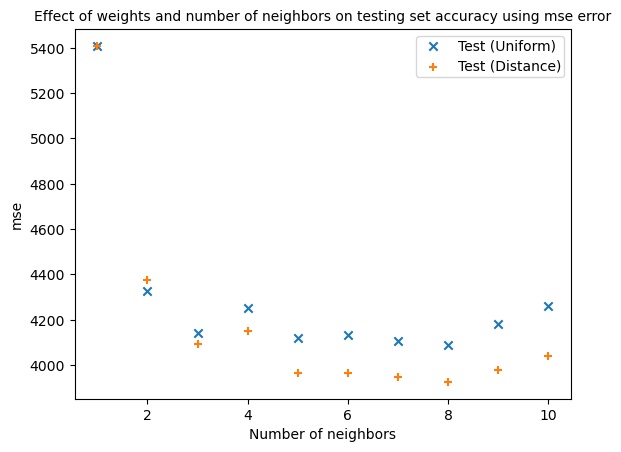

In [31]:
# Plotting the training data for both Uniform and Distance (mse)
plt.scatter(one_to_ten,training_uniform_mse,marker="x")
plt.scatter(one_to_ten,training_distance_mse,marker="+")
#plt.xlim([0, 11])
#plt.ylim([0.7, 1.1])
plt.xlabel("Number of neighbors")
plt.ylabel("mse")
legend_labels = ["Training (Uniform)","Training (Distance)"]
plt.legend(labels=legend_labels, loc="center right", borderpad=0.2)
plt.title("Effect of weights and number of neighbors on training set accuracy using mse error", fontsize=10)
plt.show()

# Plotting the testing data for both Uniform and Distance (mse)
plt.scatter(one_to_ten,testing_uniform_mse,marker="x")
plt.scatter(one_to_ten,testing_distance_mse,marker="+")
#plt.xlim([0, 11])
#plt.ylim([0.7, 1.1])
plt.xlabel("Number of neighbors")
plt.ylabel("mse")
legend_labels = ["Test (Uniform)","Test (Distance)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of weights and number of neighbors on testing set accuracy using mse error", fontsize=10)
plt.show()

## Neural Network

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np

neural_network_model = MLPRegressor()
neural_network_model.fit(X_subset, y)

neural_network_model_scores = cross_validate(neural_network_model, X_subset, y, scoring=('r2', 'neg_mean_squared_error'), cv=10, return_train_score = True)


train_r2_neural_network_model_scores = neural_network_model_scores['train_r2']
train_mean_squared_error_neural_network_model_scores = neural_network_model_scores['train_neg_mean_squared_error']

test_r2_neural_network_model_scores = neural_network_model_scores['test_r2']
test_mean_squared_error_neural_network_model_scores = neural_network_model_scores['test_neg_mean_squared_error']

# train scores
average_train_r2_neural_network_model_scorese = np.mean(train_r2_neural_network_model_scores)
print("Average Train r2 Score:", average_train_r2_neural_network_model_scorese)

average_train_mean_squared_error_neural_network_model_scores = np.mean(-train_mean_squared_error_neural_network_model_scores)
print("Average Train mean_squared_error Score:", average_train_mean_squared_error_neural_network_model_scores)

# test scores
average_test_r2_neural_network_model_score = np.mean(test_r2_neural_network_model_scores)
print("\nAverage Test r2 Score:", average_test_r2_neural_network_model_score)

average_test_mean_squared_error_neural_network_model_score = np.mean(-test_mean_squared_error_neural_network_model_scores)
print("Average Test mean_squared_error Score:", average_test_mean_squared_error_neural_network_model_score)


C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

Average Train r2 Score: -1.3792427616760368
Average Train mean_squared_error Score: 19670.235583553535

Average Test r2 Score: -1.852735901402524
Average Test mean_squared_error Score: 19793.44420159539


C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


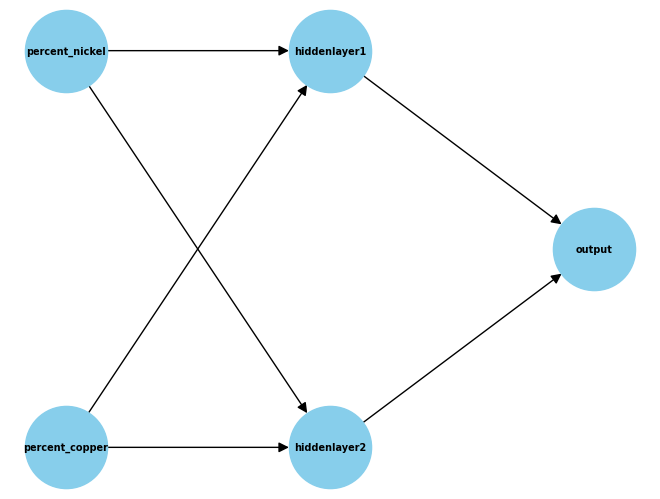

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add nodes for input features
G.add_node("percent_nickel", pos=(0, 2))
G.add_node("percent_copper", pos=(0, 0))

# Add nodes for the hidden layer
G.add_node("hiddenlayer1", pos=(2, 2))
G.add_node("hiddenlayer2", pos=(2, 0))

# Add node for the output
G.add_node("output", pos=(4, 1))

# Add edges
G.add_edges_from([("percent_nickel", "hiddenlayer1"), ("percent_nickel", "hiddenlayer2"), ("percent_copper", "hiddenlayer1"), ("percent_copper", "hiddenlayer2"), ("hiddenlayer1", "output"), ("hiddenlayer2", "output")])

# Get positions of nodes for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3500, node_color="skyblue", font_size=7, font_color="black", font_weight="bold", arrowsize=15)

# Display the plot
plt.show()

In [55]:
# List of the criterions
activation_functions = ["relu", "identity", "logistic", "tanh"]

r2_training_data1 = []
mse_training_data1 = []


r2_testing_data1 = []
mse_testing_data1 = []

for i in activation_functions:

        for j in range(96, 106):
            # Create a model using the default settings (using Gini index)
            NN = MLPRegressor(activation = i, hidden_layer_sizes = (j,), random_state = 1)
            NN.fit(X, y.values.ravel())

            NN_scores = cross_validate(NN, X, y.values.ravel(), scoring=('r2', 'neg_mean_squared_error'), cv=10, return_train_score = True)

            train_r2_NN_scores = NN_scores['train_r2']
            train_mean_squared_error_NN_scores = NN_scores['train_neg_mean_squared_error']

            test_r2_NN_scores = NN_scores['test_r2']
            test_mean_squared_error_NN_scores = NN_scores['test_neg_mean_squared_error']
            
            average_train_r2_NN_score = np.mean(train_r2_NN_scores)
            print(f"Average Train r2 Score with activation function {i} and {j} shape: {average_train_r2_NN_score}")
            r2_training_data1.append(average_train_r2_NN_score)

            average_train_mean_squared_error_NN_score = np.mean(-train_mean_squared_error_NN_scores)
            print(f"Average Train mean_squared_error Score with activation function {i} and {j} shape: {average_train_mean_squared_error_NN_score}")
            mse_training_data1.append(average_train_mean_squared_error_NN_score)

            average_test_r2_NN_score = np.mean(test_r2_NN_scores)
            print(f"Average Test r2 Score with activation function {i} and {j} shape: {average_test_r2_NN_score}")
            r2_testing_data1.append(average_test_r2_NN_score)

            average_test_mean_squared_error_NN_score = np.mean(-test_mean_squared_error_NN_scores)
            print(f"Average Test mean_squared_error Score with activation function {i} and {j} shape: {average_test_mean_squared_error_NN_score}\n")
            mse_testing_data1.append(average_test_mean_squared_error_NN_score)

C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 96 shape: 0.5392955885188918
Average Train mean_squared_error Score with activation function relu and 96 shape: 3803.5337287696443
Average Test r2 Score with activation function relu and 96 shape: 0.337244282313162
Average Test mean_squared_error Score with activation function relu and 96 shape: 4289.8792856978935



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 97 shape: 0.5300413107843902
Average Train mean_squared_error Score with activation function relu and 97 shape: 3880.770611198317
Average Test r2 Score with activation function relu and 97 shape: 0.32719527636116685
Average Test mean_squared_error Score with activation function relu and 97 shape: 4343.5676605898



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 98 shape: 0.5331726282982057
Average Train mean_squared_error Score with activation function relu and 98 shape: 3854.988487782341
Average Test r2 Score with activation function relu and 98 shape: 0.32010383512775675
Average Test mean_squared_error Score with activation function relu and 98 shape: 4363.067583421769



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 99 shape: 0.5309087299292163
Average Train mean_squared_error Score with activation function relu and 99 shape: 3873.79059583905
Average Test r2 Score with activation function relu and 99 shape: 0.3316497475638885
Average Test mean_squared_error Score with activation function relu and 99 shape: 4311.036587000716



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 100 shape: 0.5361955335057814
Average Train mean_squared_error Score with activation function relu and 100 shape: 3829.924351728251
Average Test r2 Score with activation function relu and 100 shape: 0.3198284251041889
Average Test mean_squared_error Score with activation function relu and 100 shape: 4384.894496685103



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 101 shape: 0.5432698525911311
Average Train mean_squared_error Score with activation function relu and 101 shape: 3771.8903526972936
Average Test r2 Score with activation function relu and 101 shape: 0.3366075552657173
Average Test mean_squared_error Score with activation function relu and 101 shape: 4261.478475879527



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 102 shape: 0.5330233375280832
Average Train mean_squared_error Score with activation function relu and 102 shape: 3856.086931116844
Average Test r2 Score with activation function relu and 102 shape: 0.330249308937636
Average Test mean_squared_error Score with activation function relu and 102 shape: 4302.037245076555



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 103 shape: 0.5419247547258663
Average Train mean_squared_error Score with activation function relu and 103 shape: 3782.944467700991
Average Test r2 Score with activation function relu and 103 shape: 0.3157639705145712
Average Test mean_squared_error Score with activation function relu and 103 shape: 4412.570795096025



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 104 shape: 0.5392860790981137
Average Train mean_squared_error Score with activation function relu and 104 shape: 3804.7586629750745
Average Test r2 Score with activation function relu and 104 shape: 0.33199228007769027
Average Test mean_squared_error Score with activation function relu and 104 shape: 4295.354922775272



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function relu and 105 shape: 0.5364595095549429
Average Train mean_squared_error Score with activation function relu and 105 shape: 3827.8513805680036
Average Test r2 Score with activation function relu and 105 shape: 0.3415488819727327
Average Test mean_squared_error Score with activation function relu and 105 shape: 4229.9336376406045



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 96 shape: 0.5078740184041299
Average Train mean_squared_error Score with activation function identity and 96 shape: 4061.3136644684646
Average Test r2 Score with activation function identity and 96 shape: 0.3185536829492448
Average Test mean_squared_error Score with activation function identity and 96 shape: 4354.348293914664



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 97 shape: 0.5104879968063851
Average Train mean_squared_error Score with activation function identity and 97 shape: 4041.9615253656475
Average Test r2 Score with activation function identity and 97 shape: 0.32301257007607553
Average Test mean_squared_error Score with activation function identity and 97 shape: 4309.582883061784



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 98 shape: 0.5034743665377592
Average Train mean_squared_error Score with activation function identity and 98 shape: 4100.403693023288
Average Test r2 Score with activation function identity and 98 shape: 0.3192678823555045
Average Test mean_squared_error Score with activation function identity and 98 shape: 4359.032705152919



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 99 shape: 0.5046565387825706
Average Train mean_squared_error Score with activation function identity and 99 shape: 4090.2850194952252
Average Test r2 Score with activation function identity and 99 shape: 0.32290124505640155
Average Test mean_squared_error Score with activation function identity and 99 shape: 4350.333810880538



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 100 shape: 0.511709596842463
Average Train mean_squared_error Score with activation function identity and 100 shape: 4029.2307199055767
Average Test r2 Score with activation function identity and 100 shape: 0.3231105900911581
Average Test mean_squared_error Score with activation function identity and 100 shape: 4317.368840216099



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 101 shape: 0.51346537619896
Average Train mean_squared_error Score with activation function identity and 101 shape: 4016.252260315493
Average Test r2 Score with activation function identity and 101 shape: 0.3350012940608524
Average Test mean_squared_error Score with activation function identity and 101 shape: 4275.119988347427



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 102 shape: 0.5010050463321428
Average Train mean_squared_error Score with activation function identity and 102 shape: 4118.979177701332
Average Test r2 Score with activation function identity and 102 shape: 0.3185159652328001
Average Test mean_squared_error Score with activation function identity and 102 shape: 4376.807907763852



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Train r2 Score with activation function identity and 103 shape: 0.49685224323416843
Average Train mean_squared_error Score with activation function identity and 103 shape: 4154.575642764987
Average Test r2 Score with activation function identity and 103 shape: 0.31643862299126896
Average Test mean_squared_error Score with activation function identity and 103 shape: 4377.307339037165



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Train r2 Score with activation function identity and 104 shape: 0.5200404105531804
Average Train mean_squared_error Score with activation function identity and 104 shape: 3964.220842867379
Average Test r2 Score with activation function identity and 104 shape: 0.35446014622492816
Average Test mean_squared_error Score with activation function identity and 104 shape: 4155.845984356318



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function identity and 105 shape: 0.5039264076036651
Average Train mean_squared_error Score with activation function identity and 105 shape: 4096.325573172619
Average Test r2 Score with activation function identity and 105 shape: 0.32336502415060553
Average Test mean_squared_error Score with activation function identity and 105 shape: 4334.076150029008



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 96 shape: -2.485373546665202
Average Train mean_squared_error Score with activation function logistic and 96 shape: 28816.711562697932
Average Test r2 Score with activation function logistic and 96 shape: -3.284872264144261
Average Test mean_squared_error Score with activation function logistic and 96 shape: 28903.726827845072



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 97 shape: -2.4924190346909114
Average Train mean_squared_error Score with activation function logistic and 97 shape: 28869.112285261304
Average Test r2 Score with activation function logistic and 97 shape: -3.293271303039602
Average Test mean_squared_error Score with activation function logistic and 97 shape: 28963.908530970926



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 98 shape: -2.4630560044680463
Average Train mean_squared_error Score with activation function logistic and 98 shape: 28629.75336099763
Average Test r2 Score with activation function logistic and 98 shape: -3.2559134554904885
Average Test mean_squared_error Score with activation function logistic and 98 shape: 28734.883805296115



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 99 shape: -2.4568983051307822
Average Train mean_squared_error Score with activation function logistic and 99 shape: 28579.111029286094
Average Test r2 Score with activation function logistic and 99 shape: -3.247668737780586
Average Test mean_squared_error Score with activation function logistic and 99 shape: 28668.67087607325



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 100 shape: -2.462933163174476
Average Train mean_squared_error Score with activation function logistic and 100 shape: 28630.023955990306
Average Test r2 Score with activation function logistic and 100 shape: -3.2557608186436893
Average Test mean_squared_error Score with activation function logistic and 100 shape: 28726.27264901271



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 101 shape: -2.3750884937449523
Average Train mean_squared_error Score with activation function logistic and 101 shape: 27901.47588204058
Average Test r2 Score with activation function logistic and 101 shape: -3.1391681894126036
Average Test mean_squared_error Score with activation function logistic and 101 shape: 27978.486614819638



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 102 shape: -2.394665844290297
Average Train mean_squared_error Score with activation function logistic and 102 shape: 28067.807360252125
Average Test r2 Score with activation function logistic and 102 shape: -3.163637828298037
Average Test mean_squared_error Score with activation function logistic and 102 shape: 28130.936164308416



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 103 shape: -2.4142111904826584
Average Train mean_squared_error Score with activation function logistic and 103 shape: 28226.25614280366
Average Test r2 Score with activation function logistic and 103 shape: -3.1891492192158264
Average Test mean_squared_error Score with activation function logistic and 103 shape: 28292.87993865098



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 104 shape: -2.3179248949514273
Average Train mean_squared_error Score with activation function logistic and 104 shape: 27430.496809758806
Average Test r2 Score with activation function logistic and 104 shape: -3.0662903554678165
Average Test mean_squared_error Score with activation function logistic and 104 shape: 27532.581621803063



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function logistic and 105 shape: -2.3742708696621166
Average Train mean_squared_error Score with activation function logistic and 105 shape: 27899.640227329208
Average Test r2 Score with activation function logistic and 105 shape: -3.136809323139812
Average Test mean_squared_error Score with activation function logistic and 105 shape: 27951.194903664833



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 96 shape: -2.085406563757741
Average Train mean_squared_error Score with activation function tanh and 96 shape: 25510.8873775585
Average Test r2 Score with activation function tanh and 96 shape: -2.7889941283143314
Average Test mean_squared_error Score with activation function tanh and 96 shape: 25733.445984353475



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 97 shape: -2.1557696237419908
Average Train mean_squared_error Score with activation function tanh and 97 shape: 26092.707205167157
Average Test r2 Score with activation function tanh and 97 shape: -2.893583378335334
Average Test mean_squared_error Score with activation function tanh and 97 shape: 26364.026741386013



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 98 shape: -2.0997684898178113
Average Train mean_squared_error Score with activation function tanh and 98 shape: 25630.123871097043
Average Test r2 Score with activation function tanh and 98 shape: -2.8326099768857262
Average Test mean_squared_error Score with activation function tanh and 98 shape: 25955.890117498384



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 99 shape: -2.0981729854640028
Average Train mean_squared_error Score with activation function tanh and 99 shape: 25615.975062435184
Average Test r2 Score with activation function tanh and 99 shape: -2.824182891528128
Average Test mean_squared_error Score with activation function tanh and 99 shape: 25924.086191636125



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 100 shape: -2.0715766085226095
Average Train mean_squared_error Score with activation function tanh and 100 shape: 25397.454811044016
Average Test r2 Score with activation function tanh and 100 shape: -2.7806766806465806
Average Test mean_squared_error Score with activation function tanh and 100 shape: 25658.5862826905



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 101 shape: -2.0648370691881417
Average Train mean_squared_error Score with activation function tanh and 101 shape: 25340.579398788326
Average Test r2 Score with activation function tanh and 101 shape: -2.7713563706935735
Average Test mean_squared_error Score with activation function tanh and 101 shape: 25603.20129427162



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 102 shape: -2.0847714587802657
Average Train mean_squared_error Score with activation function tanh and 102 shape: 25505.626102294867
Average Test r2 Score with activation function tanh and 102 shape: -2.786960982663478
Average Test mean_squared_error Score with activation function tanh and 102 shape: 25723.93353434158



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 103 shape: -2.0307204105625614
Average Train mean_squared_error Score with activation function tanh and 103 shape: 25059.29718554852
Average Test r2 Score with activation function tanh and 103 shape: -2.73268613654033
Average Test mean_squared_error Score with activation function tanh and 103 shape: 25346.858099295096



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 104 shape: -1.9972625520303116
Average Train mean_squared_error Score with activation function tanh and 104 shape: 24782.97604414003
Average Test r2 Score with activation function tanh and 104 shape: -2.6817424539437393
Average Test mean_squared_error Score with activation function tanh and 104 shape: 25038.557192358647



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Average Train r2 Score with activation function tanh and 105 shape: -2.0219728375197983
Average Train mean_squared_error Score with activation function tanh and 105 shape: 24986.292782147873
Average Test r2 Score with activation function tanh and 105 shape: -2.7196188071030427
Average Test mean_squared_error Score with activation function tanh and 105 shape: 25271.04767821957



C:\Users\hamee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
# r2 scores data
training_relu_r2 = r2_training_data1[0:10]
testing_relu_r2 = r2_testing_data1[0:10]

training_identity_r2 = r2_training_data1[10:20]
testing_identity_r2 = r2_testing_data1[10:20]

training_logistic_r2 = r2_training_data1[20:30]
testing_logistic_r2 = r2_testing_data1[20:30]

training_tanh_r2 = r2_training_data1[30:40]
testing_tanh_r2 = r2_testing_data1[30:40]


# mse data
training_relu_mse = mse_training_data1[0:10]
testing_relu_mse = mse_testing_data1[0:10]

training_identity_mse = mse_training_data1[10:20]
testing_identity_mse = mse_testing_data1[10:20]

training_logistic_mse = mse_training_data1[20:30]
testing_logistic_mse = mse_testing_data1[20:30]

training_tanh_mse = mse_training_data1[30:40]
testing_tanh_mse = mse_testing_data1[30:40]

In [58]:
# List of range 96-105
ninetysix_to_onehunderedfive = list(range(96,106))

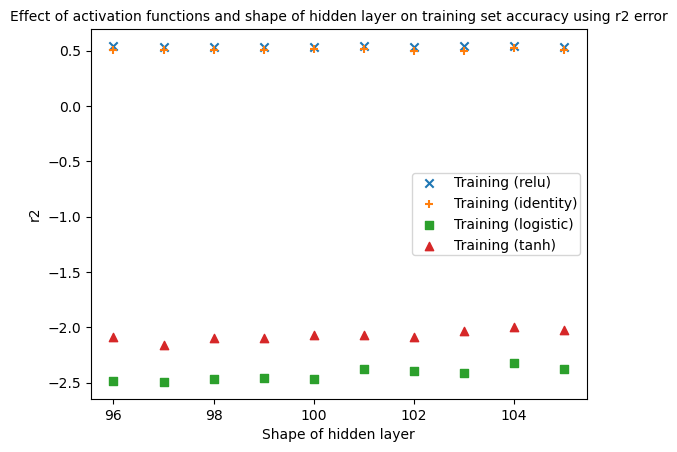

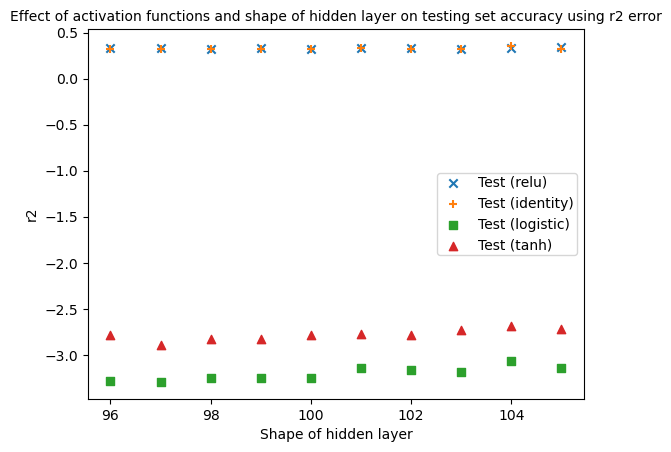

In [62]:
# Plotting the training data for the activation functions (r2)
plt.scatter(ninetysix_to_onehunderedfive, training_relu_r2, marker="x")
plt.scatter(ninetysix_to_onehunderedfive, training_identity_r2, marker="+")
plt.scatter(ninetysix_to_onehunderedfive, training_logistic_r2, marker="s")
plt.scatter(ninetysix_to_onehunderedfive, training_tanh_r2, marker="^")
plt.xlabel("Shape of hidden layer")
plt.ylabel("r2")
legend_labels = ["Training (relu)","Training (identity)","Training (logistic)","Training (tanh)"]
plt.legend(labels=legend_labels, loc="center right", borderpad=0.2)
plt.title("Effect of activation functions and shape of hidden layer on training set accuracy using r2 error", fontsize=10)
plt.show()

# Plotting the testing data for the activation functions (r2)
plt.scatter(ninetysix_to_onehunderedfive, testing_relu_r2, marker="x")
plt.scatter(ninetysix_to_onehunderedfive, testing_identity_r2, marker="+")
plt.scatter(ninetysix_to_onehunderedfive, testing_logistic_r2, marker="s")
plt.scatter(ninetysix_to_onehunderedfive, testing_tanh_r2, marker="^")
plt.xlabel("Shape of hidden layer")
plt.ylabel("r2")
legend_labels = ["Test (relu)","Test (identity)","Test (logistic)","Test (tanh)"]
plt.legend(labels=legend_labels, loc="center right", borderpad=0.2)
plt.title("Effect of activation functions and shape of hidden layer on testing set accuracy using r2 error", fontsize=10)
plt.show()

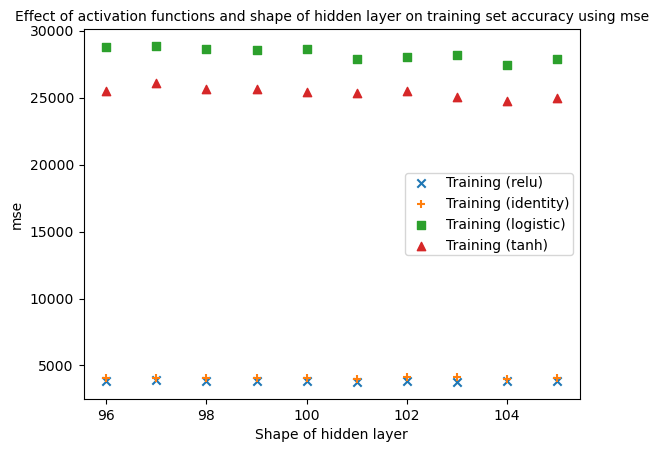

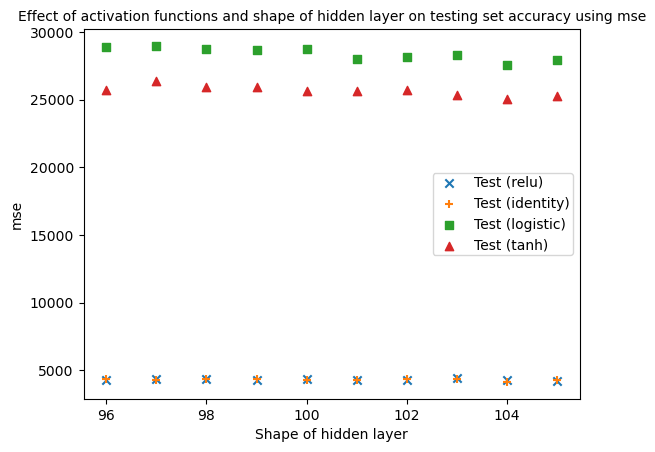

In [63]:
# Plotting the training data for the activation functions (mse)
plt.scatter(ninetysix_to_onehunderedfive, training_relu_mse, marker="x")
plt.scatter(ninetysix_to_onehunderedfive, training_identity_mse, marker="+")
plt.scatter(ninetysix_to_onehunderedfive, training_logistic_mse, marker="s")
plt.scatter(ninetysix_to_onehunderedfive, training_tanh_mse, marker="^")
plt.xlabel("Shape of hidden layer")
plt.ylabel("mse")
legend_labels = ["Training (relu)","Training (identity)","Training (logistic)","Training (tanh)"]
plt.legend(labels=legend_labels, loc="center right", borderpad=0.2)
plt.title("Effect of activation functions and shape of hidden layer on training set accuracy using mse", fontsize=10)
plt.show()

# Plotting the testing data for the activation functions (mse)
plt.scatter(ninetysix_to_onehunderedfive, testing_relu_mse, marker="x")
plt.scatter(ninetysix_to_onehunderedfive, testing_identity_mse, marker="+")
plt.scatter(ninetysix_to_onehunderedfive, testing_logistic_mse, marker="s")
plt.scatter(ninetysix_to_onehunderedfive, testing_tanh_mse, marker="^")
plt.xlabel("Shape of hidden layer")
plt.ylabel("mse")
legend_labels = ["Test (relu)","Test (identity)","Test (logistic)","Test (tanh)"]
plt.legend(labels=legend_labels, loc="center right", borderpad=0.2)
plt.title("Effect of activation functions and shape of hidden layer on testing set accuracy using mse", fontsize=10)
plt.show()

In [66]:
max(r2_training_data1)

0.5432698525911311

In [67]:
min(mse_training_data1)

3771.8903526972936

In [68]:
max(r2_testing_data1)

0.35446014622492816

In [70]:
min(mse_testing_data1)

4155.845984356318